In [52]:
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install -U ru2en

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ru2en (from versions: none)
ERROR: No matching distribution found for ru2en


In [3]:
!python -m spacy download ru_core_news_sm

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.3 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.2/15.3 MB 1.6 MB/s eta 0:00:10
      --------------------------------------- 0.3/15.3 MB 1.6 MB/s eta 0:00:10
      --------------------------------------- 0.4/15.3 MB 1.8 MB/s eta 0:00:09
     - -------------------------------------- 0.6/15.3 MB 2.4 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/15.3 MB 2.8 MB/s eta 0:00:06
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/15.3 MB 3.2 MB/s

In [28]:
import spacy
from spacy import displacy
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [5]:
nlp = spacy.load('ru_core_news_sm')

In [31]:
Mashenka = open("c:\\Users\\maria\\Downloads\\Nabokov_Mashenka.txt").read() #Машенька (1926)
Camera = open("c:\\Users\\maria\\Downloads\\Camera_Obscura.txt").read() # Камера обскура (1932)
Despair = open("c:\\Users\\maria\\Downloads\\Nabokov_-_Otchayanie.txt").read() # Отчаяние (1934)
Gift = open("c:\\Users\\maria\\Downloads\\Dar.txt").read() # Дар (1938)
Lolita = open("c:\\Users\\maria\\Downloads\\Lolita1.txt").read() #Лолита (1955)
Transparent = open("c:\\Users\\maria\\Downloads\\Prozrachnye_predmety.txt").read() #Прозрачные предметы (1972)

In [59]:
def sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    sentence_word_length = [len(sent.split()) for sent in sentences]
    mean_sentence_len = np.mean(sentence_word_length)
    print('Средняя длина предложения: ', mean_sentence_len)
    return mean_sentence_len

def interrogative_sentence(text):
    interrogative_count = 0
    total_sentences = 0

    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if sent_text.endswith('?'):
            interrogative_count += 1
        total_sentences += 1

    if total_sentences > 0:
        proportion = interrogative_count / total_sentences
    else:
        proportion = 0

    print('Соотношение вопросительных предложений ко всему тексту:', proportion)
    return interrogative_count   
        
def exclamatory_sentence(text):
    exclamatory_count = 0
    total_sentences = 0

    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if sent_text.endswith('!'):
            exclamatory_count += 1
        total_sentences += 1

    if total_sentences > 0:
        proportion = exclamatory_count / total_sentences
    else:
        proportion = 0

    print('Соотношение восклицательных предложений ко всему тексту:', proportion)
    return exclamatory_count

def simple_sentence(text):
    simple_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) == 1 and not any([token.dep_ == 'cc' for token in sent]):
            simple_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = simple_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение простых предложений ко всему тексту:', proportion)
    return simple_count

def complex_sentence(text):
    complex_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) > 1 and any([token.dep_ == 'cc' for token in sent]):
            complex_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = complex_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение сложноподчиненных предложений ко всему тексту:', proportion)
    return complex_count

def compound_sentence(text):
    compound_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) > 1 and not any([token.dep_ == 'cc' for token in sent]):
            compound_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = compound_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение сложносочиненных предложений ко всему тексту:', proportion)
    return compound_count

Средняя длина предложения:  15.61111111111111
Средняя длина предложения:  14.72961956521739
Средняя длина предложения:  15.880650994575046
Средняя длина предложения:  21.163606010016693
Средняя длина предложения:  18.979644707623983
Средняя длина предложения:  18.94859437751004


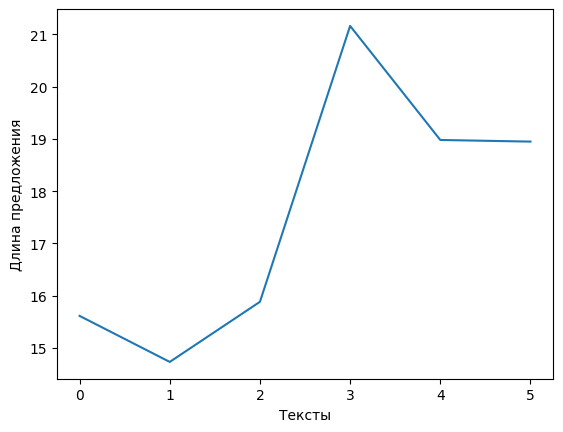

In [36]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
sentence_lengths = []

for text in texts:
    mean_sentence_length = sentence_length(text)
    sentence_lengths.append(mean_sentence_length)
    
plt.plot(sentence_lengths)
plt.xlabel("Тексты")
plt.ylabel("Длина предложения")
plt.show()

Соотношение вопросительных предложений ко всему тексту: 0.04382929642445214
Соотношение вопросительных предложений ко всему тексту: 0.0195822454308094
Соотношение вопросительных предложений ко всему тексту: 0.03657694962042788
Соотношение вопросительных предложений ко всему тексту: 0.047245530828164906
Соотношение вопросительных предложений ко всему тексту: 0.052779864763335835
Соотношение вопросительных предложений ко всему тексту: 0.04688832054560955


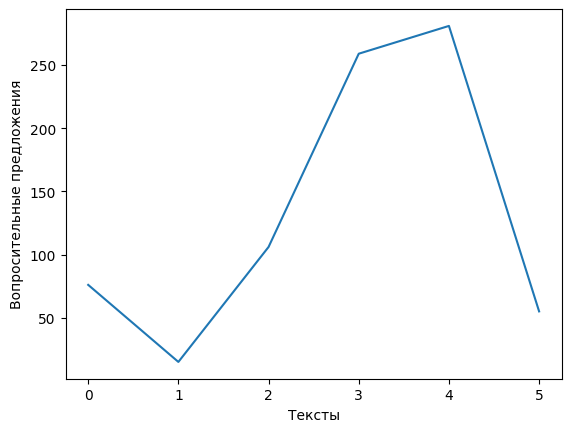

In [47]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
interrogative_sentences = []

for text in texts:
    interrogative_count = interrogative_sentence(text)
    interrogative_sentences.append(interrogative_count)
    
plt.plot(interrogative_sentences)
plt.xlabel("Тексты")
plt.ylabel("Вопросительные предложения")
plt.show()

Соотношение восклицательных предложений ко всему тексту: 0.006343713956170703
Соотношение восклицательных предложений ко всему тексту: 0.006527415143603133
Соотношение восклицательных предложений ко всему тексту: 0.023809523809523808
Соотношение восклицательных предложений ко всему тексту: 0.032287486318861726
Соотношение восклицательных предложений ко всему тексту: 0.050713749060856496
Соотношение восклицательных предложений ко всему тексту: 0.03324808184143223


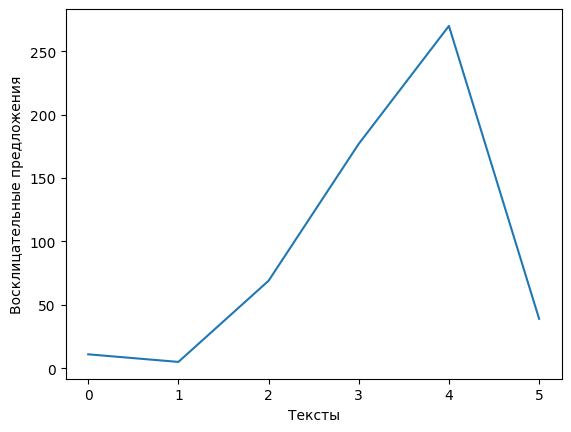

In [45]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
exclamatory_sentences = []

for text in texts:
    exclamatory_count = exclamatory_sentence(text)
    exclamatory_sentences.append(exclamatory_count)
    
plt.plot(exclamatory_sentences)
plt.xlabel("Тексты")
plt.ylabel("Восклицательные предложения")
plt.show()

Соотношение простых предложений ко всему тексту: 0.005190311418685121
Соотношение простых предложений ко всему тексту: 0.005221932114882507
Соотношение простых предложений ко всему тексту: 0.0
Соотношение простых предложений ко всему тексту: 0.002918642831083546
Соотношение простых предложений ко всему тексту: 0.0018782870022539444
Соотношение простых предложений ко всему тексту: 0.0034100596760443308


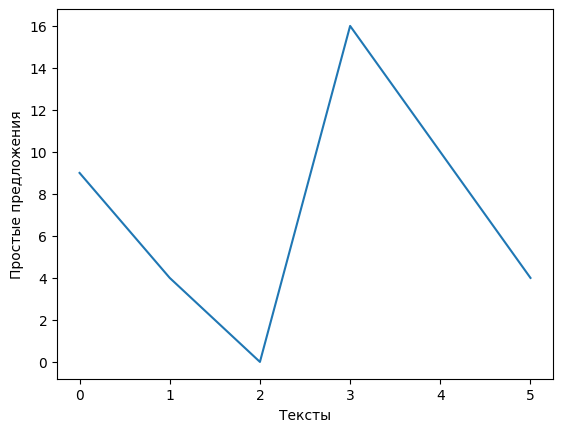

In [56]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
simple_sentences = []

for text in texts:
    simple_count = simple_sentence(text)
    simple_sentences.append(simple_count)
    
plt.plot(simple_sentences)
plt.xlabel("Тексты")
plt.ylabel("Простые предложения")
plt.show()

Соотношение сложноподчиненных предложений ко всему тексту: 0.461361014994233
Соотношение сложноподчиненных предложений ко всему тексту: 0.4216710182767624
Соотношение сложноподчиненных предложений ко всему тексту: 0.4271911663216011
Соотношение сложноподчиненных предложений ко всему тексту: 0.4903319956220358
Соотношение сложноподчиненных предложений ко всему тексту: 0.45886551465063863
Соотношение сложноподчиненных предложений ко всему тексту: 0.5370843989769821


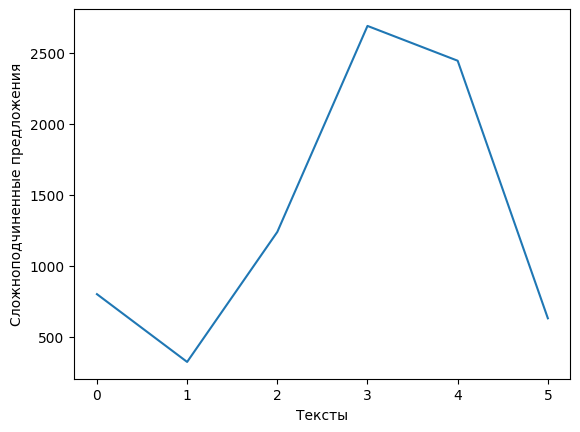

In [60]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
complex_sentences = []

for text in texts:
    complex_count = complex_sentence(text)
    complex_sentences.append(complex_count)
    
plt.plot(complex_sentences)
plt.xlabel("Тексты")
plt.ylabel("Сложноподчиненные предложения")
plt.show()

Соотношение сложносочиненных предложений ко всему тексту: 0.5334486735870819
Соотношение сложносочиненных предложений ко всему тексту: 0.5731070496083551
Соотношение сложносочиненных предложений ко всему тексту: 0.5728088336783989
Соотношение сложносочиненных предложений ко всему тексту: 0.5067493615468807
Соотношение сложносочиненных предложений ко всему тексту: 0.5392561983471075
Соотношение сложносочиненных предложений ко всему тексту: 0.4595055413469736


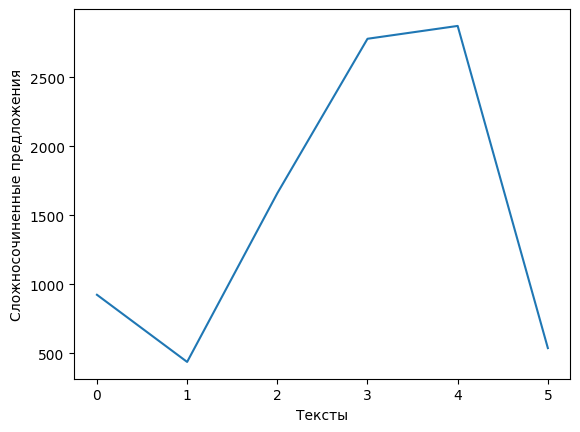

In [61]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
compound_sentences = []

for text in texts:
    compound_count = compound_sentence(text)
    compound_sentences.append(compound_count)
    
plt.plot(compound_sentences)
plt.xlabel("Тексты")
plt.ylabel("Сложносочиненные предложения")
plt.show()